In [8]:
import pandas as pd
import numpy as np

from tqdm import tqdm

import matplotlib.pyplot as plt; plt.style.use('ggplot')
import seaborn as sns

from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

# Reading the csv 
heart = pd.read_csv('framingham.csv')
heart = heart.dropna()
heart.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [6]:
X = heart[['age', 'currentSmoker', 'totChol', 'BMI', 'heartRate']].copy()
Y = heart['TenYearCHD']

md1_results, md2_results, md3_results, md4_results = list(), list(), list(), list()

for i in tqdm(range(0, 10)):

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify = Y)

    #############
    ## Model 1 ##
    #############

    md1 = make_pipeline(MinMaxScaler(), MLPClassifier(hidden_layer_sizes = (4,), 
                                                      activation = 'tanh', 
                                                      solver = 'sgd', 
                                                      max_iter = 1000, 
                                                      batch_size = 500)).fit(X_train, Y_train)

    md1_pred = md1.predict_proba(X_test)[:, 1]
    md1_pred = np.where(md1_pred < 0.15, 0, 1)
    md1_results.append(recall_score(Y_test, md1_pred))

    #############
    ## Model 2 ##
    #############

    md2 = make_pipeline(MinMaxScaler(), MLPClassifier(hidden_layer_sizes = (4,), 
                                                      activation = 'relu', 
                                                      solver = 'sgd', 
                                                      max_iter = 1000, 
                                                      batch_size = 500)).fit(X_train, Y_train)

    md2_pred = md2.predict_proba(X_test)[:, 1]
    md2_pred = np.where(md2_pred < 0.15, 0, 1)
    md2_results.append(recall_score(Y_test, md2_pred))

    #############
    ## Model 3 ##
    #############

    md3 = make_pipeline(MinMaxScaler(), SVC(kernel = 'rbf',
                                             probability = True)).fit(X_train, Y_train)
    
    md3_pred = md3.predict_proba(X_test)[:, 1]
    md3_pred = np.where(md3_pred < 0.15, 0, 1)
    md3_results.append(recall_score(Y_test, md3_pred))

    #############
    ## Model 4 ##
    #############

    md4 = make_pipeline(MinMaxScaler(), SVC(kernel = 'poly',
                                             probability = True)).fit(X_train, Y_train)
    
    md4_pred = md4.predict_proba(X_test)[:, 1]
    md4_pred = np.where(md4_pred < 0.15, 0, 1)
    md4_results.append(recall_score(Y_test, md4_pred))

100%|██████████| 10/10 [00:35<00:00,  3.55s/it]


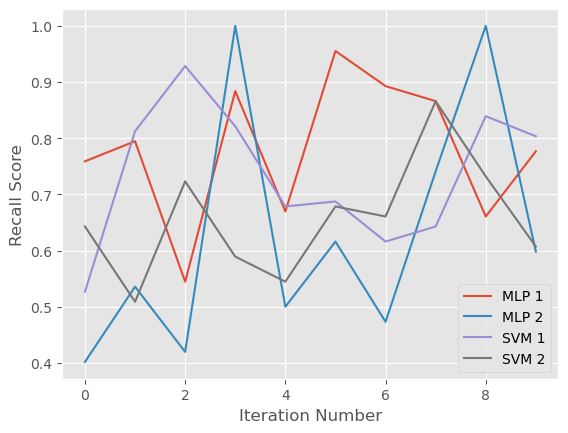

In [13]:
sns.lineplot(x = [i for i in range(0, 10)], y = md1_results, label = 'MLP 1')
sns.lineplot(x = [i for i in range(0, 10)], y = md2_results, label = 'MLP 2')
sns.lineplot(x = [i for i in range(0, 10)], y = md3_results, label = 'SVM 1')
sns.lineplot(x = [i for i in range(0, 10)], y = md4_results, label = 'SVM 2')
plt.xlabel('Iteration Number')
plt.ylabel('Recall Score');